In [108]:
import pandas as pd
import numpy as np

In [109]:
df = pd.read_csv("../../data/mobile_classification/train.csv")
df.sample(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
77,1234,1,1.6,1,1,0,33,0.6,172,1,...,166,778,1449,11,7,6,0,0,1,0
1383,1763,0,0.5,1,12,0,10,0.2,184,3,...,238,1893,792,17,12,13,1,0,1,0
1163,1930,1,2.0,0,11,0,16,0.8,186,8,...,1901,1920,1783,17,3,13,0,0,1,2


In [110]:
train_size = int(0.7*df.shape[0])
val_size = int(0.2*df.shape[0])

print(train_size, val_size)
traindf = df.iloc[:train_size, :]
valdf = df.iloc[train_size:train_size+val_size, :]
testdf = df.iloc[train_size+val_size:, :]

1400 400


In [111]:
print(traindf.shape)
print(valdf.shape)
print(testdf.shape)

(1400, 21)
(400, 21)
(200, 21)


In [112]:
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def evaluate(clf, X, y, xval, yval):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    # plot_decision_regions(X.values, y.values, clf=clf)
    y_pred = clf.predict(xval)
    print(accuracy_score(yval,y_pred))

### Bagging

In [113]:
xval = valdf.iloc[:, :-1].values
yval = valdf.iloc[:, -1].values
print(xval[:3])
print(yval[:3])

[[1.325e+03 1.000e+00 5.000e-01 0.000e+00 0.000e+00 1.000e+00 1.300e+01
  1.000e+00 1.330e+02 4.000e+00 8.000e+00 1.353e+03 1.915e+03 3.707e+03
  1.900e+01 3.000e+00 1.800e+01 1.000e+00 1.000e+00 0.000e+00]
 [9.500e+02 0.000e+00 5.000e-01 0.000e+00 6.000e+00 1.000e+00 5.500e+01
  1.000e-01 1.240e+02 8.000e+00 7.000e+00 8.600e+01 1.681e+03 1.305e+03
  6.000e+00 5.000e+00 4.000e+00 1.000e+00 0.000e+00 1.000e+00]
 [9.480e+02 0.000e+00 1.500e+00 1.000e+00 6.000e+00 0.000e+00 1.800e+01
  3.000e-01 1.190e+02 4.000e+00 7.000e+00 3.400e+02 1.728e+03 2.926e+03
  1.700e+01 1.300e+01 9.000e+00 1.000e+00 1.000e+00 1.000e+00]]
[3 0 2]


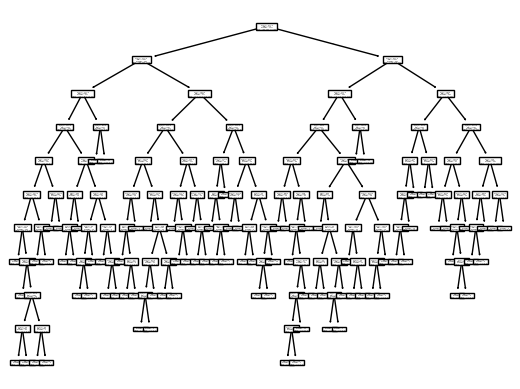

0.82


c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [114]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier()
df1 = traindf.sample(int(.8*traindf.shape[0]), replace=True)
x1, y1 = df1.iloc[:, :-1], df1.iloc[:, -1]
evaluate(dt1, x1, y1, xval, yval)

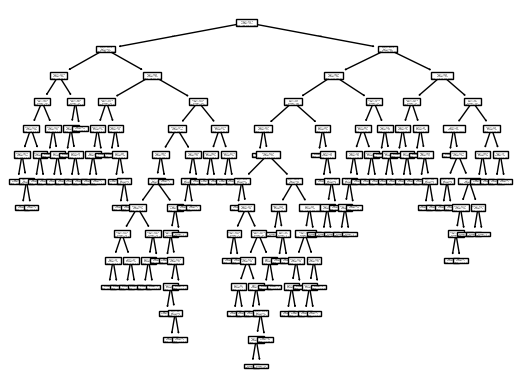

0.7925


c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [115]:
dt2 = DecisionTreeClassifier()
df2 = traindf.sample(int(.8*traindf.shape[0]), replace=True)
x1, y1 = df2.iloc[:, :-1], df2.iloc[:, -1]
evaluate(dt2, x1, y1, xval, yval)

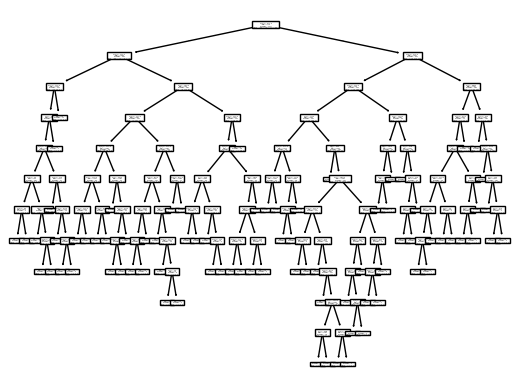

0.7825


c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [116]:
dt3 = DecisionTreeClassifier()
df3 = traindf.sample(int(.8*traindf.shape[0]), replace=True)
x1, y1 = df3.iloc[:, :-1], df3.iloc[:, -1]
evaluate(dt3, x1, y1, xval, yval)

In [117]:
from collections import Counter

def pred(val):

    a1 = dt1.predict(val)[0]
    a2 = dt2.predict(val)[0]
    a3 = dt3.predict(val)[0]


    lst = [a1, a2, a3]
    # Create a Counter object
    counter = Counter(lst)

    # Get the element(s) with the highest frequency
    max_value = max(counter.values())
    max_elements = [key for key, value in counter.items() if value == max_value]

    return max_elements[0]

In [118]:
ypred = []
for i in range(testdf.shape[0]):
    ypred.append(pred(testdf.iloc[i, :-1].values.reshape(1, 20)))

c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid

In [119]:
print(ypred)
print(list(testdf.iloc[:, -1]))

[0, 1, 3, 3, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 3, 3, 1, 0, 2, 0, 3, 1, 2, 3, 1, 2, 3, 3, 0, 1, 1, 2, 2, 2, 1, 2, 1, 0, 2, 3, 1, 0, 3, 1, 3, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 2, 3, 2, 0, 0, 0, 0, 3, 0, 2, 3, 2, 3, 3, 3, 3, 1, 0, 3, 1, 0, 1, 2, 0, 2, 1, 0, 0, 3, 0, 1, 2, 0, 3, 2, 0, 0, 3, 0, 2, 0, 3, 3, 0, 1, 2, 2, 2, 3, 0, 1, 2, 2, 1, 3, 0, 1, 0, 0, 2, 1, 0, 2, 0, 3, 1, 0, 2, 1, 2, 1, 3, 0, 2, 3, 1, 1, 1, 2, 1, 3, 2, 2, 2, 2, 3, 1, 0, 0, 0, 0, 3, 1, 2, 1, 0, 1, 3, 0, 3, 0, 3, 2, 2, 3, 0, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 3, 1, 2, 0, 2, 1, 1, 1, 1, 2, 3, 1, 3, 1, 0, 1, 1, 0, 2, 1, 3, 3, 0, 2, 3, 0, 2]
[0, 1, 3, 3, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 3, 3, 1, 0, 2, 0, 3, 1, 2, 2, 1, 2, 3, 3, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 2, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 3, 2, 0, 0, 0, 0, 3, 0, 2, 3, 2, 3, 3, 2, 3, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 0, 3, 0, 1, 2, 0, 3, 1, 0, 0, 3, 0, 1, 0, 3, 3, 0, 1, 2, 2, 2, 3, 0, 1, 3, 3, 1, 3, 0, 1, 0, 0, 2, 1, 0, 2, 0, 3, 1, 0, 2, 1, 2, 1, 3, 0, 2, 3, 1, 1,

In [120]:
accuracy_score(ypred, testdf.iloc[:, -1])

0.84

### Pasting

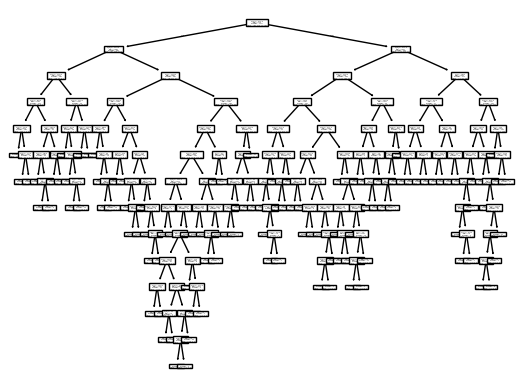

0.8275


c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [121]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier()
df1 = traindf.sample(int(.8*traindf.shape[0]))
x1, y1 = df1.iloc[:, :-1], df1.iloc[:, -1]
evaluate(dt1, x1, y1, xval, yval)

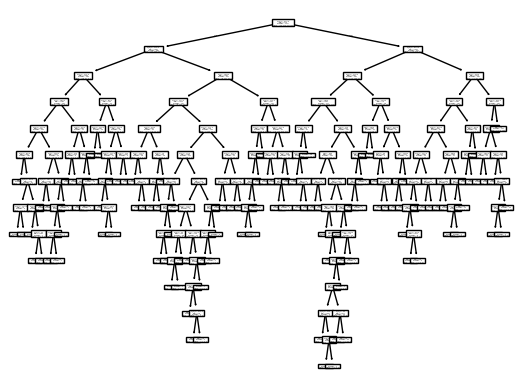

0.8125


c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [122]:
dt2 = DecisionTreeClassifier()
df2 = traindf.sample(int(.8*traindf.shape[0]))
x1, y1 = df2.iloc[:, :-1], df2.iloc[:, -1]
evaluate(dt2, x1, y1, xval, yval)

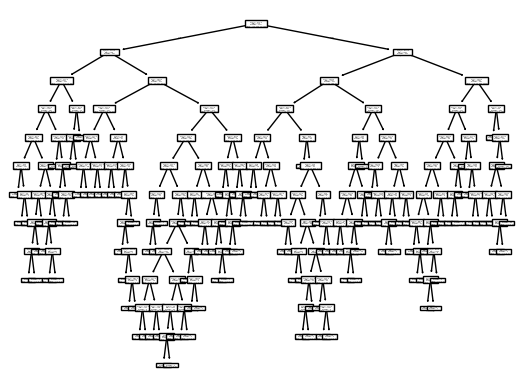

0.825


c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [123]:
dt3 = DecisionTreeClassifier()
df3 = traindf.sample(int(.8*traindf.shape[0]))
x1, y1 = df3.iloc[:, :-1], df3.iloc[:, -1]
evaluate(dt3, x1, y1, xval, yval)

In [124]:
ypred = []
for i in range(testdf.shape[0]):
    ypred.append(pred(testdf.iloc[i, :-1].values.reshape(1, 20)))

c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid

In [125]:
accuracy_score(ypred, testdf.iloc[:, -1])

0.88

### Random Subspace

In [161]:
featno = int(0.5*valdf.shape[1])

Index(['m_dep', 'pc', 'four_g', 'int_memory', 'dual_sim', 'touch_screen',
       'ram', 'clock_speed', 'sc_h', 'mobile_wt'],
      dtype='object')
Index(['dual_sim', 'four_g', 'pc', 'int_memory', 'sc_h', 'wifi', 'sc_w',
       'n_cores', 'touch_screen', 'fc'],
      dtype='object')
Index(['wifi', 'ram', 'n_cores', 'm_dep', 'sc_h', 'talk_time', 'pc',
       'mobile_wt', 'four_g', 'fc'],
      dtype='object')


In [191]:
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def evaluate(clf, X, y, xval, yval):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    # plot_decision_regions(X.values, y.values, clf=clf)
    y_pred = clf.predict(xval)
    return (accuracy_score(yval,y_pred))

C:\Users\ishub\AppData\Local\Temp\ipykernel_23816\304646332.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf1['price_range'] = traindf.iloc[:, -1]


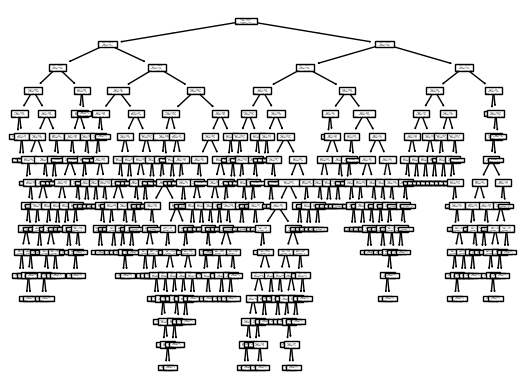

0.65

In [204]:
from sklearn.tree import DecisionTreeClassifier

c1 = valdf.iloc[:, :-1].sample(featno, axis=1, random_state=10).columns
xval1 = valdf[c1]
yval1 = valdf.iloc[:, -1]

dt1 = DecisionTreeClassifier()
traindf1 = traindf[list(xval1.columns)] 
traindf1['price_range'] = traindf.iloc[:, -1]
df1 = traindf1.sample(int(.8*traindf.shape[0]))
x1, y1 = df1.iloc[:, :-1], df1.iloc[:, -1]
evaluate(dt1, x1, y1, xval1, yval1)

C:\Users\ishub\AppData\Local\Temp\ipykernel_23816\450109246.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf2['price_range'] = traindf.iloc[:, -1]


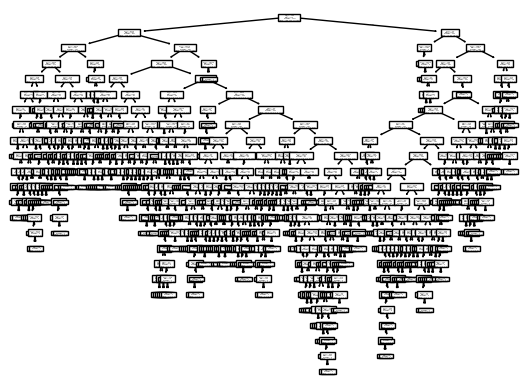

0.2425


In [205]:
from sklearn.tree import DecisionTreeClassifier


c2 = valdf.iloc[:, :-1].sample(featno, axis=1, random_state=1000).columns
xval2 = valdf[c2]
yval2 = valdf.iloc[:, -1]

dt2 = DecisionTreeClassifier()
traindf2 = traindf[list(xval2.columns)] 
traindf2['price_range'] = traindf.iloc[:, -1]
traindf2.sample(5)
df2 = traindf2.sample(int(.8*traindf.shape[0]), random_state=i*5)
x2, y2 = df2.iloc[:, :-1], df1.iloc[:, -1]
print(evaluate(dt2, x2, y2, xval2, yval2))


C:\Users\ishub\AppData\Local\Temp\ipykernel_23816\54502096.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf3['price_range'] = traindf.iloc[:, -1]


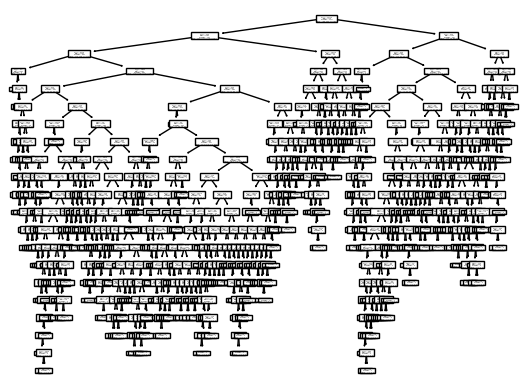

0.255

In [206]:
from sklearn.tree import DecisionTreeClassifier

c3 = valdf.iloc[:, :-1].sample(featno, axis=1, random_state=1000).columns
xval3 = valdf[c3]
yval3 = valdf.iloc[:, -1]

dt3 = DecisionTreeClassifier()
traindf3 = traindf[list(xval3.columns)] 
traindf3['price_range'] = traindf.iloc[:, -1]
traindf3.sample(5)
df3 = traindf3.sample(int(.8*traindf.shape[0]))
x3, y3 = df3.iloc[:, :-1], df1.iloc[:, -1]
evaluate(dt3, x3, y3, xval3, yval3)

In [213]:
from collections import Counter

def pred(val):

    a1 = dt1.predict(val[c1].values.reshape(1, 10))[0]
    a2 = dt2.predict(val[c2].values.reshape(1, 10))[0]
    a3 = dt3.predict(val[c3].values.reshape(1, 10))[0]


    lst = [a1, a2, a3]
    # Create a Counter object
    counter = Counter(lst)

    # Get the element(s) with the highest frequency
    max_value = max(counter.values())
    max_elements = [key for key, value in counter.items() if value == max_value]

    return max_elements[0]

In [214]:
ypred = []
for i in range(testdf.shape[0]):
    ypred.append(pred(testdf.iloc[i, :-1]))

c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid

In [215]:
accuracy_score(ypred, testdf.iloc[:, -1])

0.515

### Random Patches

In [216]:
featno = int(0.75*valdf.shape[1])

C:\Users\ishub\AppData\Local\Temp\ipykernel_23816\2906476387.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf1['price_range'] = traindf.iloc[:, -1]


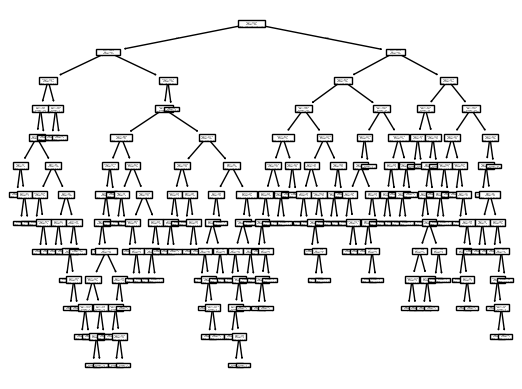

0.7225

In [219]:
from sklearn.tree import DecisionTreeClassifier

c1 = valdf.iloc[:, :-1].sample(featno, axis=1, random_state=10).columns
xval1 = valdf[c1]
yval1 = valdf.iloc[:, -1]

dt1 = DecisionTreeClassifier()
traindf1 = traindf[list(xval1.columns)]
traindf1['price_range'] = traindf.iloc[:, -1]
df1 = traindf1.sample(int(.8*traindf.shape[0])).sample(800)
x1, y1 = df1.iloc[:, :-1], df1.iloc[:, -1]
evaluate(dt1, x1, y1, xval1, yval1)

C:\Users\ishub\AppData\Local\Temp\ipykernel_23816\2435650339.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf2['price_range'] = traindf.iloc[:, -1]


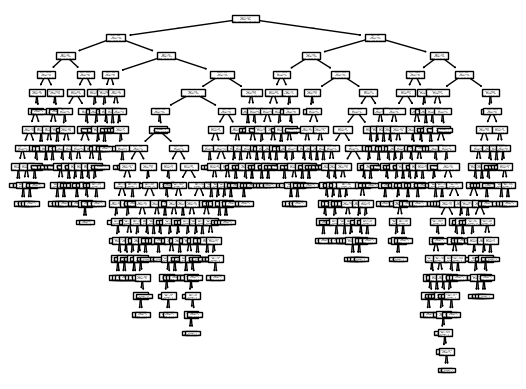

0.255


In [220]:
from sklearn.tree import DecisionTreeClassifier


c2 = valdf.iloc[:, :-1].sample(featno, axis=1, random_state=1000).columns
xval2 = valdf[c2]
yval2 = valdf.iloc[:, -1]

dt2 = DecisionTreeClassifier()
traindf2 = traindf[list(xval2.columns)] 
traindf2['price_range'] = traindf.iloc[:, -1]
traindf2.sample(5)
df2 = traindf2.sample(int(.8*traindf.shape[0]), random_state=i*5).sample(800)
x2, y2 = df2.iloc[:, :-1], df1.iloc[:, -1]
print(evaluate(dt2, x2, y2, xval2, yval2))


C:\Users\ishub\AppData\Local\Temp\ipykernel_23816\2764531939.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf3['price_range'] = traindf.iloc[:, -1]


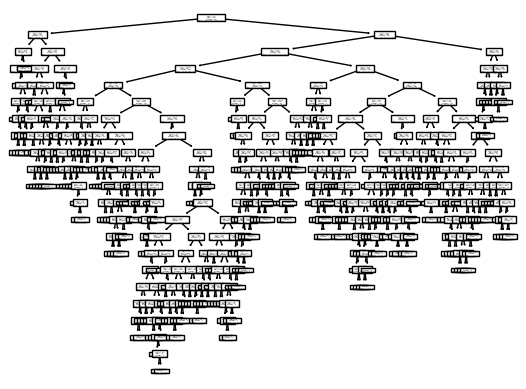

0.25

In [221]:
from sklearn.tree import DecisionTreeClassifier

c3 = valdf.iloc[:, :-1].sample(featno, axis=1, random_state=1000).columns
xval3 = valdf[c3]
yval3 = valdf.iloc[:, -1]

dt3 = DecisionTreeClassifier()
traindf3 = traindf[list(xval3.columns)] 
traindf3['price_range'] = traindf.iloc[:, -1]
traindf3.sample(5)
df3 = traindf3.sample(int(.8*traindf.shape[0])).sample(800)
x3, y3 = df3.iloc[:, :-1], df1.iloc[:, -1]
evaluate(dt3, x3, y3, xval3, yval3)

In [223]:
from collections import Counter

def pred(val):

    a1 = dt1.predict(val[c1].values.reshape(1, 15))[0]
    a2 = dt2.predict(val[c2].values.reshape(1, 15))[0]
    a3 = dt3.predict(val[c3].values.reshape(1, 15))[0]


    lst = [a1, a2, a3]
    # Create a Counter object
    counter = Counter(lst)

    # Get the element(s) with the highest frequency
    max_value = max(counter.values())
    max_elements = [key for key, value in counter.items() if value == max_value]

    return max_elements[0]

In [224]:
ypred = []
for i in range(testdf.shape[0]):
    ypred.append(pred(testdf.iloc[i, :-1]))

c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid

In [225]:
accuracy_score(ypred, testdf.iloc[:, -1])

0.61